In [2]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load  Model
model = load_model('/content/drive/MyDrive/model.keras')

In [4]:
# Dictionary nama original kelas
class_names = {
    'Acne': 0,
    'Actinic Keratosis': 1,
    'Basal Cell Carcinoma': 2,
    'Eczemaa': 3,
    'Rosacea': 4
}

# Balik key-value
index_to_class = {v: k for k, v in class_names.items()}

# Load dan siapkan gambar
img_path = '/content/drive/MyDrive/acne.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
pred_probs = model.predict(img_array)
pred_class_index = np.argmax(pred_probs, axis=1)[0]
pred_class_name = index_to_class[pred_class_index]

# Tampilkan hasil
print(f"Predicted Class Index: {pred_class_index}")
print(f"Predicted Class Name: {pred_class_name}")
print(f"Prediction Probabilities: {pred_probs[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Predicted Class Index: 0
Predicted Class Name: Acne
Prediction Probabilities: [0.9307393  0.00382533 0.00968107 0.03975603 0.01599832]


dilihat dari nilai prediction probabilities  yang terbesar ada pada index 0 yaitu acne

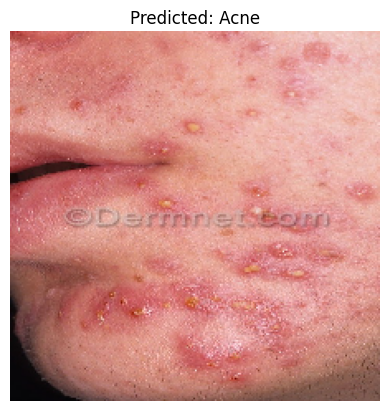

In [5]:
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.title(f"Predicted: {pred_class_name}")
plt.axis('off')
plt.show()

Hasil Prediksi untuk gambar pertama yang belum  pernah dilihat sebelumnya oleh model adalah **ACNE**